# Gala

In [167]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Load Data
dataset = pd.read_csv("../Apple462.csv")
dataset

# Split data from region and drop the unused data
netherlands_dataset = dataset[dataset['region'] == 'Netherland']
netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Fuji'], axis=1, inplace=True)


netherlands_dataset # Show dataframe

C:\Users\maiwi\AppData\Local\Temp\ipykernel_944\672829825.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset.drop(['Unnamed: 0', 'Envi', 'Fuji'], axis=1, inplace=True)


,Date,Gala,region
884,27/12/2015,126151.0,Netherland
885,20/12/2015,127372.0,Netherland
886,13/12/2015,81450.0,Netherland
887,6/12/2015,7041.0,Netherland
888,29/11/2015,4335.0,Netherland
...,...,...,...
3508,4/2/2018,7990.0,Netherland
3509,28/1/2018,17666.0,Netherland
3510,21/1/2018,10598.0,Netherland
3511,14/1/2018,6066.0,Netherland


In [168]:
netherlands_dataset.count() # see df count to check misvalue

Date      169
Gala      168
region    169
dtype: int64

## Filter samples have over range 

In [169]:
netherlands_dataset = netherlands_dataset[netherlands_dataset['Gala'] <= 100000] # best 100000 , 210000
netherlands_dataset

,Date,Gala,region
886,13/12/2015,81450.0,Netherland
887,6/12/2015,7041.0,Netherland
888,29/11/2015,4335.0,Netherland
889,22/11/2015,6924.0,Netherland
890,15/11/2015,4611.0,Netherland
...,...,...,...
3508,4/2/2018,7990.0,Netherland
3509,28/1/2018,17666.0,Netherland
3510,21/1/2018,10598.0,Netherland
3511,14/1/2018,6066.0,Netherland


## Fill the average value to misvalue in dataframe

In [170]:
# average Gala
avg_Gala = math.ceil(netherlands_dataset['Gala'].sum() / len(netherlands_dataset['Gala']))

print(f"Average Gala: {avg_Gala}")

# add avg in miss value
netherlands_dataset['Gala'].fillna(avg_Gala, inplace=True)

netherlands_dataset.count()

Average Gala: 13435


C:\Users\maiwi\AppData\Local\Temp\ipykernel_944\4148005068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Gala'].fillna(avg_Gala, inplace=True)


Date      144
Gala      144
region    144
dtype: int64

In [171]:
netherlands_dataset

,Date,Gala,region
886,13/12/2015,81450.0,Netherland
887,6/12/2015,7041.0,Netherland
888,29/11/2015,4335.0,Netherland
889,22/11/2015,6924.0,Netherland
890,15/11/2015,4611.0,Netherland
...,...,...,...
3508,4/2/2018,7990.0,Netherland
3509,28/1/2018,17666.0,Netherland
3510,21/1/2018,10598.0,Netherland
3511,14/1/2018,6066.0,Netherland


## Graph Before Training

Show the graph after sorted by 'Date'

In [172]:
netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date'], format='%d/%m/%Y') # transform date format d/m/y to y-m-d for using sort function
netherlands_dataset = netherlands_dataset.sort_values(by='Date') # sort by date

# netherlands_dataset


C:\Users\maiwi\AppData\Local\Temp\ipykernel_944\3455395017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netherlands_dataset['Date'] = pd.to_datetime(netherlands_dataset['Date'], format='%d/%m/%Y') # transform date format d/m/y to y-m-d for using sort function


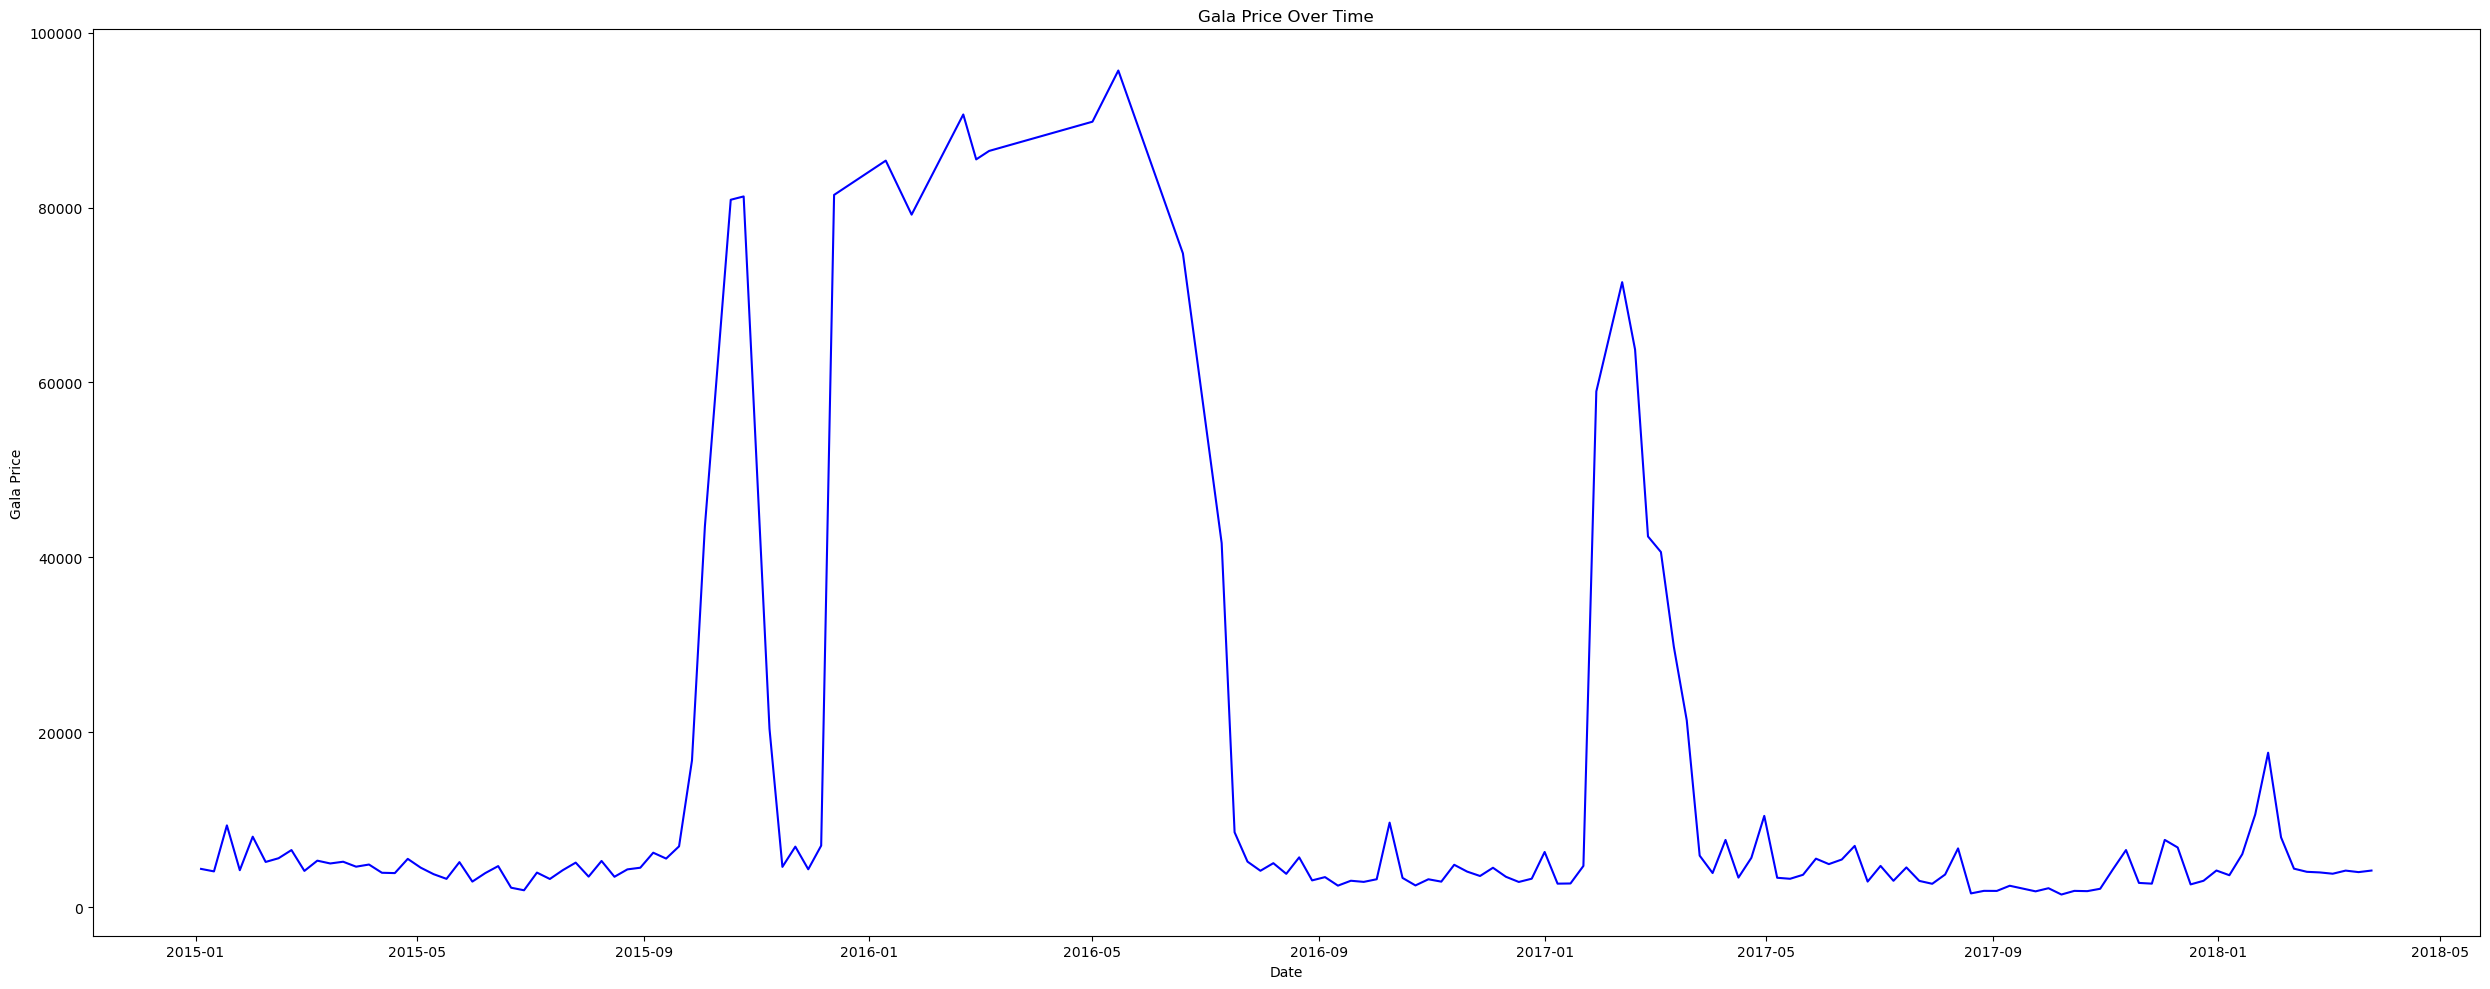

In [173]:
# graph size
plt.figure(figsize=(25, 10))
plt.plot(netherlands_dataset['Date'], netherlands_dataset['Gala'], color='b')

plt.xlabel('Date')

plt.ylabel('Gala Price')
# plt.yscale('log') # set log scale

plt.title('Gala Price Over Time')
# plt.xticks(rotation=90, fontsize=10) 
plt.tight_layout()

plt.show()

## Scale 

Use StandardScaler from sklearn to scale down the 'Gala' feature

In [174]:
# # scale
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(netherlands_dataset[['Gala']])
# netherlands_dataset['Gala'] = scaled_data

# netherlands_dataset

## Create new feature 

We make the function date_split to split 1 feature to get the 3 feature  
* year
* month
* day

and get_season function to make the season

In [175]:
# function สำหรับสร้าง feature เพิ่ม (year, month, day)

def date_split(data):
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month   
    data['day'] = data['Date'].dt.day

date_split(netherlands_dataset)


def get_season(day, month):
    if (month == 3 and day >= 21) or month in range(4, 6) or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or month in range(7, 9) or (month == 9 and day < 21):
        return 'Summer'
    elif (month == 9 and day >= 21) or month in range(10, 12) or (month == 12 and day < 21):
        return 'Autumn'
    else:
        return 'Winter'

netherlands_dataset['season'] = netherlands_dataset.apply(lambda x: get_season(x['day'], x['month']), axis=1)

season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
netherlands_dataset['season'] = netherlands_dataset['season'].map(season_mapping)



df = netherlands_dataset.set_index('Date') # set 'Date' to id because it unique

### This is the df after prepare and it ready to train the model

In [176]:
df

,Gala,region,year,month,day,season
Date,,,,,,
2015-01-04,4379.0,Netherland,2015,1,4,3
2015-01-11,4094.0,Netherland,2015,1,11,3
2015-01-18,9354.0,Netherland,2015,1,18,3
2015-01-25,4231.0,Netherland,2015,1,25,3
2015-02-01,8063.0,Netherland,2015,2,1,3
...,...,...,...,...,...,...
2018-02-25,3976.0,Netherland,2018,2,25,3
2018-03-04,3827.0,Netherland,2018,3,4,3
2018-03-11,4184.0,Netherland,2018,3,11,3


## For case user time step 

The Gala_x1 gets the next label of the next sample, you can uncomment below if you want to test 

In [177]:
df['Gala_x1'] = df['Gala'].shift(-1, fill_value=0)
df['Gala_x2'] = df['Gala'].shift(-2, fill_value=0)
df['Gala_x3'] = df['Gala'].shift(-3, fill_value=0)
df['Gala_x4'] = df['Gala'].shift(-4, fill_value=0)
df['Gala_x5'] = df['Gala'].shift(-5, fill_value=0)

# df['Gala_x6'] = df['Gala'].shift(-6, fill_value=0)
# df['Gala_x7'] = df['Gala'].shift(-7, fill_value=0)
# df['Gala_x8'] = df['Gala'].shift(-8, fill_value=0)

df['Gala_avg_next_5_days'] = (df['Gala'].shift(-1) + df['Gala'].shift(-2) + df['Gala'].shift(-3) + df['Gala'].shift(-4) + df['Gala'].shift(-5)) / 5

df.drop(df.tail(5).index, inplace=True)

df.drop(['Gala_x1', 'Gala_x2', 'Gala_x3', 'Gala_x4', 'Gala_x5'], axis=True, inplace=True)

df

,Gala,region,year,month,day,season,Gala_avg_next_5_days
Date,,,,,,,
2015-01-04,4379.0,Netherland,2015,1,4,3,6183.4
2015-01-11,4094.0,Netherland,2015,1,11,3,6484.2
2015-01-18,9354.0,Netherland,2015,1,18,3,5919.8
2015-01-25,4231.0,Netherland,2015,1,25,3,5903.6
2015-02-01,8063.0,Netherland,2015,2,1,3,5355.4
...,...,...,...,...,...,...,...
2018-01-21,10598.0,Netherland,2018,1,21,3,7616.8
2018-01-28,17666.0,Netherland,2018,1,28,3,4849.0
2018-02-04,7990.0,Netherland,2018,2,4,3,4087.8


## Set seed_value 

In [178]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

## Train and Test Model

In [179]:
# Algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Loss Function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


df.drop(['region'], axis=1, inplace=True)

df['Date_ordinal'] = df.index.to_series().apply(lambda x: x.toordinal())

train, test = train_test_split(df, test_size=0.15)


X_train = train.drop(['Gala'], axis=1)
y_train = train['Gala']

X_test = test.drop(['Gala'], axis=1)
y_test = test['Gala']

# Test Algorithm 
dt_reg = DecisionTreeRegressor() # best
# dt_reg = LinearRegression()
# dt_reg = SVR()
# dt_reg = GradientBoostingRegressor() 
# dt_reg = MLPRegressor()
# dt_reg = RandomForestRegressor()

dt_reg.fit(X_train, y_train)


dt_pred = dt_reg.predict(X_test)

test['Gala_Predicted'] = dt_pred

# Show performance
MSE = mean_squared_error(y_test, dt_pred)
print(f'Mean Squared Error: {MSE}')

MAE = mean_absolute_error(y_test, dt_pred)
print(f'Mean Absolute Error: {MAE}')

R2 = r2_score(y_test, dt_pred)
print(f'R2 Score: {MAE}')


Mean Squared Error: 47463151.71428572
Mean Absolute Error: 4242.666666666667
R2 Score: 4242.666666666667


In [180]:
test

,Gala,year,month,day,season,Gala_avg_next_5_days,Date_ordinal,Gala_Predicted
Date,,,,,,,,
2018-01-28,17666.0,2018,1,28,3,4849.0,736722,6532.0
2016-09-18,3024.0,2016,9,18,1,4319.8,736225,3349.0
2015-08-09,5288.0,2015,8,9,1,4821.4,735819,8568.0
2017-10-01,2170.0,2017,10,1,2,2323.0,736603,1449.0
2015-11-08,20404.0,2015,11,8,2,20872.2,735910,4611.0
2015-03-29,4633.0,2015,3,29,0,4552.6,735686,10441.0
2016-02-28,85512.0,2016,2,28,3,77672.8,736022,86478.0
2016-10-02,3196.0,2016,10,2,2,4324.8,736239,3440.0
2017-11-26,2692.0,2017,11,26,2,4868.6,736659,2776.0


## Graph after training

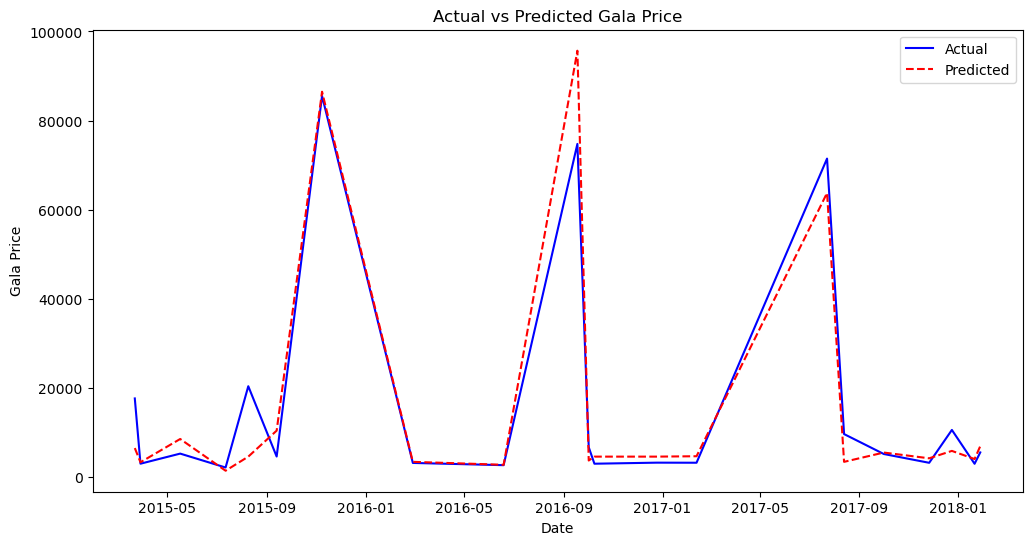

In [181]:
test = test.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, dt_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
# plt.yscale('log')
plt.ylabel('Gala Price')
plt.title('Actual vs Predicted Gala Price')
plt.legend()
plt.show()


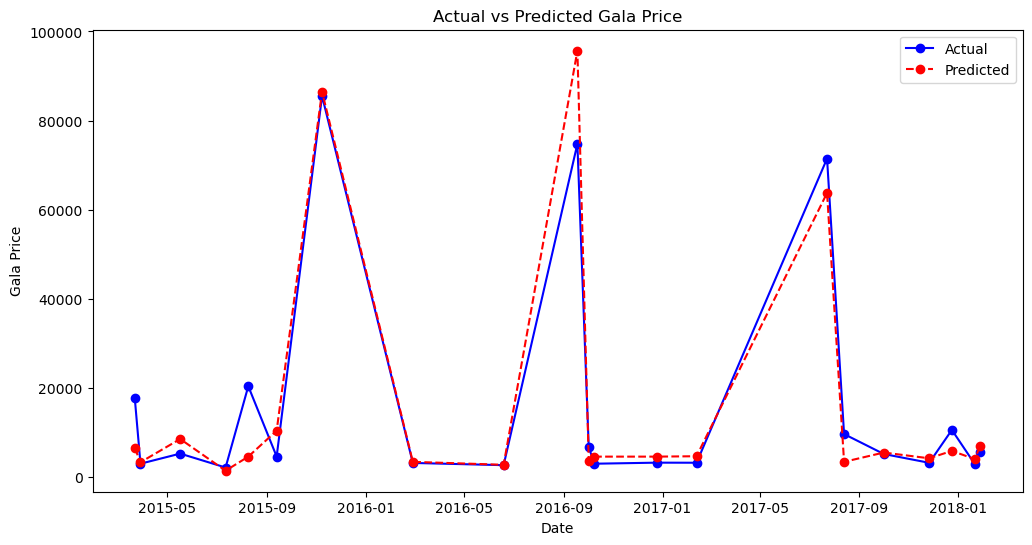

In [182]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(test.index, dt_pred, label='Predicted', color='red', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Gala Price')
plt.title('Actual vs Predicted Gala Price')
plt.legend()
plt.show()


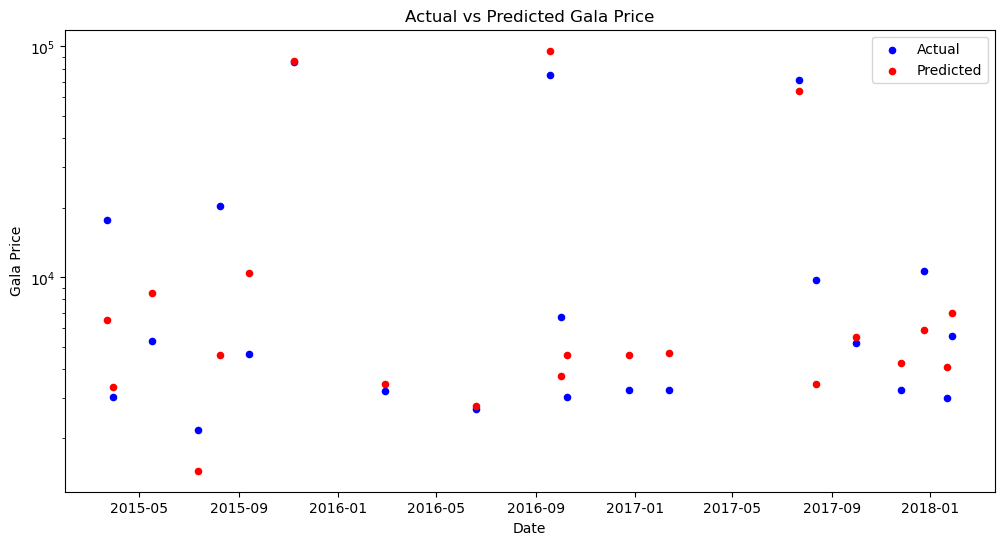

In [183]:
plt.figure(figsize=(12, 6))
plt.scatter(test.index, y_test, label='Actual', color='blue', s=20) 
plt.scatter(test.index, dt_pred, label='Predicted', color='red', s=20)  
plt.xlabel('Date')
plt.ylabel('Gala Price')
plt.yscale('log')
plt.title('Actual vs Predicted Gala Price')
plt.legend()
plt.show()


In [184]:
feature_importance = dt_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
for idx in sorted_idx:
    print(f'Feature: {X_train.columns[idx]}, Importance: {feature_importance[idx]}')


Feature: Gala_avg_next_5_days, Importance: 0.6368775771922798
Feature: season, Importance: 0.1302774175811739
Feature: month, Importance: 0.12120507757541732
Feature: Date_ordinal, Importance: 0.06543733055956037
Feature: year, Importance: 0.0401026819430732
Feature: day, Importance: 0.006099915148495491


In [185]:
df_pred = dt_reg.predict(df.drop(['Gala'], axis=1))
df['Gala_pred'] = df_pred
df.drop(['year', 'month', 'day', 'season', 'Date_ordinal', 'Gala_avg_next_5_days'], axis=1, inplace=True)
df

,Gala,Gala_pred
Date,,
2015-01-04,4379.0,4379.0
2015-01-11,4094.0,4094.0
2015-01-18,9354.0,9354.0
2015-01-25,4231.0,4231.0
2015-02-01,8063.0,8063.0
...,...,...
2018-01-21,10598.0,5897.0
2018-01-28,17666.0,6532.0
2018-02-04,7990.0,7990.0
